# Stock Analysis

### The following code will analyze a series of stock and perfomr a seires of basics analsysis that will try to find realtionship between them

In [32]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import talib

ModuleNotFoundError: No module named 'talib'

In [5]:
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

In [6]:
response = requests.get(url)
html_content = response.content

In [8]:
soup = BeautifulSoup(html_content, 'html.parser')
table = soup.find('table', {'class': 'wikitable sortable'})

In the following code i Add

In [17]:
symbols = []
names = []
gicsSectors = []
gicsSubIndustries = []
ciks = []
rows = table.find_all('tr')[1:] 
for row in rows:
    cells = row.find_all('td')
    symbol = cells[0].text.strip()
    name = cells[1].text.strip()
    gicsSector = cells[2].text.strip()
    gicsSubIndustry = cells[3].text.strip()
    cik = cells[6].text.strip()
    symbols.append(symbol)
    names.append(name)
    gicsSectors.append(gicsSector)
    gicsSubIndustries.append(gicsSubIndustry)
    ciks.append(cik)



[<td><a class="external text" href="https://www.nyse.com/quote/XNYS:ZTS" rel="nofollow">ZTS</a>
</td>, <td><a href="/wiki/Zoetis" title="Zoetis">Zoetis</a></td>, <td>Health Care</td>, <td>Pharmaceuticals</td>, <td><a class="mw-redirect" href="/wiki/Parsippany,_New_Jersey" title="Parsippany, New Jersey">Parsippany, New Jersey</a></td>, <td>2013-06-21</td>, <td>0001555280</td>, <td>1952
</td>]


In [21]:
data = { 'Name':names,
        'Symbol':symbols,
        'GIC Sector':gicsSectors,
        'GIC SubIndustry':gicsSubIndustries,
        'CIK':ciks
}

data_SP500 = pd.DataFrame(data)

In [23]:
data_SP500.sample(5)

,Name,Symbol,GIC Sector,GIC SubIndustry,CIK
370,PepsiCo,PEP,Consumer Staples,Soft Drinks & Non-alcoholic Beverages,0000077476
426,Stanley Black & Decker,SWK,Industrials,Industrial Machinery & Supplies & Components,0000093556
159,DTE Energy,DTE,Utilities,Multi-Utilities,0000936340
501,Zions Bancorporation,ZION,Financials,Regional Banks,0000109380
300,Marathon Petroleum,MPC,Energy,Oil & Gas Refining & Marketing,0001510295


In [24]:
# We took 10 Random Symbols to run an overall analysis

In [29]:
sample10 = data_SP500['Symbol'].sample(10).to_list()

In [30]:
sample10

['CARR', 'ZION', 'MA', 'ETSY', 'LNC', 'LLY', 'AJG', 'ZBH', 'HAS', 'GOOG']

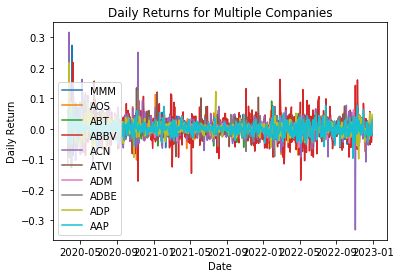

In [36]:
data = pd.DataFrame()
for symbol in sample10:
    ticker = yf.Ticker(symbol)
    data[symbol] = ticker.history(period='1d', start='2019-01-01', end='2022-12-30')['Close']

# Calculate daily returns for each company
returns = data.pct_change()

# Plot the daily returns for each company
plt.plot(returns)
plt.legend(symbols)
plt.title('Daily Returns for Multiple Companies')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.show()

In [37]:
returns[]

,CARR,ZION,MA,ETSY,LNC,LLY,AJG,ZBH,HAS,GOOG
Date,,,,,,,,,,
2020-03-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-20,0.062500,-0.061284,-0.069250,-0.085690,-0.112383,-0.080322,0.044201,-0.035450,-0.024953,-0.038528
2020-03-23,-0.094902,-0.058640,-0.038407,0.042285,0.016999,-0.027369,-0.046661,-0.060130,0.124919,-0.014641
2020-03-24,0.013865,0.045681,0.166109,0.154405,0.317003,0.032255,0.132327,0.155798,0.216696,0.073669
2020-03-25,0.149573,0.026608,0.081875,0.082874,0.098031,-0.007730,-0.000777,0.036724,0.058311,-0.028181
...,...,...,...,...,...,...,...,...,...,...
2022-12-22,-0.009741,0.014925,-0.012063,-0.051962,-0.023440,-0.007337,-0.007653,-0.002282,0.000000,-0.022050
2022-12-23,0.002639,0.003521,0.006090,-0.003219,0.018594,0.007090,0.002021,0.001106,0.008839,0.017562
2022-12-27,0.001914,0.008050,0.007451,-0.044115,-0.011284,-0.008209,0.004618,0.004657,0.010651,-0.020933


In [40]:
def moving_average(data,stock ,avg=5):
    moving_avg = data[stock].rolling(window=avg).mean()
    return moving_avg



In [44]:

test_1 = moving_average(returns,"GOOG",20)
test_2 = moving_average(returns, "ETSY",20)

test_3 = moving_average(returns,"GOOG",10)
test_4 = moving_average(returns, "ETSY",10)

test_5 = moving_average(returns,"GOOG",20)
test_6 = moving_average(returns, "ETSY",20)

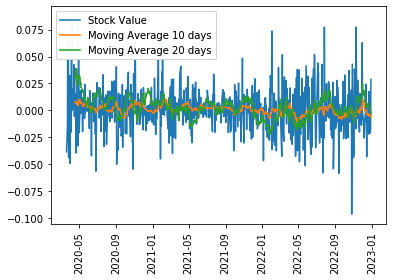

In [48]:
plt.plot(returns["GOOG"], label= "Stock Value")
plt.plot(test_5, label = "Moving Average 10 days")
plt.plot(test_6, label = "Moving Average 20 days")
plt.xticks(rotation=90)

legend1 = plt.legend(loc='upper left')
plt.gca().add_artist(legend1)